# [CDAF] Atividade 1

## Nome e matrícula
Nome: Thiago Pádua de Carvalho

Matrícula: 2020007066

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão, trabalhando em cima do dataset do Soccer Prediction Challenge, disponível no Moodle.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie um histograma para a quantidade de gols marcados por jogo do time da casa, do time fora, de gols totais e da diferença de gols por partida.
- Caso hajam instâncias com valores nitidamente errados, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média de cada um dos 4 histogramas solicitados acima.

In [20]:
df = pd.read_excel("data/TrainingSet_2023_02_08.xlsx", sheet_name=0)

df = df[df['HS'] >= 0]  # Keeps only line where number of goals (home or away) are non negative
df = df[df['AS'] >= 0]
df.head()


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L


In [52]:
def plot_and_show_measures(dataframe, title, xlabel='', ylabel=''):
    plt.hist(dataframe, color='purple')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    max_value = max(dataframe)
    min_value = min(dataframe)
    mean_value = np.mean(dataframe)

    print(f"Maximum number of goals: {max_value}\nMinimum number of goals: {min_value}\nMean number of goals: {mean_value}")

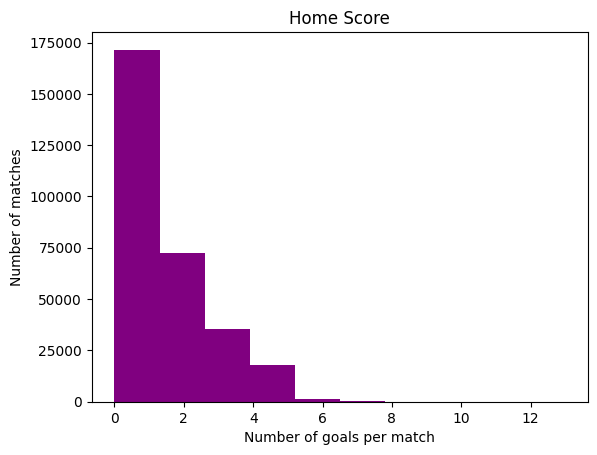

Maximum number of goals: 13
Minimum number of goals: 0
Mean number of goals: 1.471700194179949


In [53]:
goals_home = df['HS']
plot_and_show_measures(goals_home, 'Home Score', 'Number of goals per match', 'Number of matches')

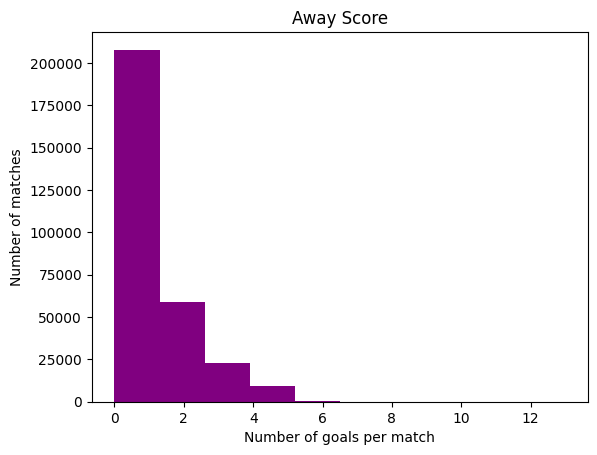

Maximum number of goals: 13
Minimum number of goals: 0
Mean number of goals: 1.1214410090673013


In [54]:
goals_away = df['AS']
plot_and_show_measures(goals_away, 'Away Score', 'Number of goals per match', 'Number of matches')

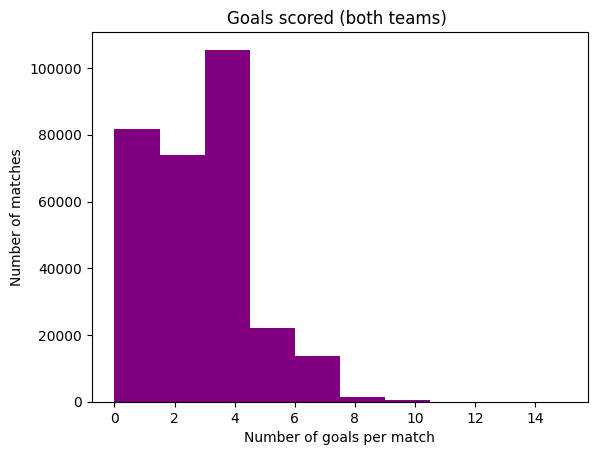

Maximum number of goals: 15
Minimum number of goals: 0
Mean number of goals: 2.5931412032472503


In [55]:
goals_total = goals_home + goals_away
plot_and_show_measures(goals_total, 'Goals scored (both teams) ', 'Number of goals per match', 'Number of matches')

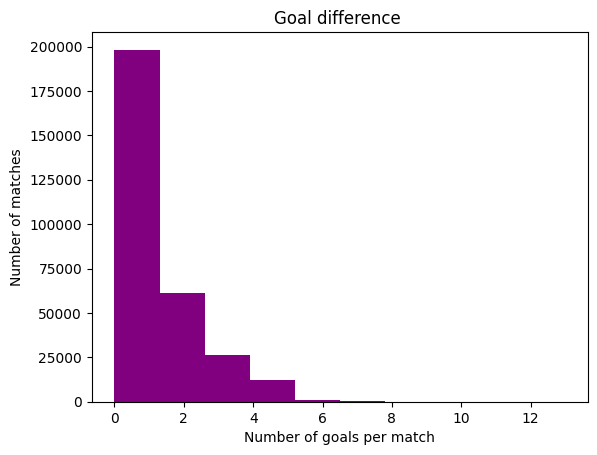

Maximum number of goals: 13
Minimum number of goals: 0
Mean number of goals: 1.2660332144635653


In [56]:
goals_diff = abs(df['GD'])
plot_and_show_measures(goals_diff, 'Goal difference ', 'Number of goals per match', 'Number of matches')

## Questão 2
- Escolha uma temporada que já terminou, de alguma das ligas presentes no dataset.
- Realize os mesmos histogramas da questão 1, mas agora para a temporada escolhida.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre a qualidade ofensiva da liga escolhida vs. o todo?

## Questão 3
- À partir dos dados do campeonato em selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordena a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo para apenas para a primeira metade de jogos.

## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um histograma com a probabilidade de diferentes placares entre os times.

## Questão 5
- Utilize o modelo treinado para simular os placares esperados de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 é um empate.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? O que isso pode indicar em termos de o que modelo subestima e superestima sobre a qualidade dos times?